# BANK MARKETING CAMPAIGN - FULL DATA

The data is related with direct marketing campaigns of a Portuguese banking institution.<br>
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

## FEATURE DESCRIPTION

> Input variables:

> Bank client data:
>- 1 - age (numeric)
>- 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
>- 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
>- 4 - education (categorical: "unknown","secondary","primary","tertiary")
>- 5 - default: has credit in default? (binary: "yes","no")
>- 6 - balance: average yearly balance, in euros (numeric) 
>- 7 - housing: has housing loan? (binary: "yes","no")
>- 8 - loan: has personal loan? (binary: "yes","no")

> Related with the last contact of the current campaign:
>- 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
>- 10 - day: last contact day of the month (numeric)
>- 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
>- 12 - duration: last contact duration, in seconds (numeric)

> Other attributes:
>- 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
>- 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
>- 15 - previous: number of contacts performed before this campaign and for this client (numeric)
>- 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

> Output variable (desired target):
>- 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import statsmodels.api as sm

# import library untuk encoder
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

# import library untuk scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# import library untuk selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

#import library untuk modeling
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, roc_auc_score, roc_curve, precision_score, f1_score

# import vif dari statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

# untuk undersampling & oversampling
from imblearn.over_sampling import SMOTE

# untuk hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# import library ensemble
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier, GradientBoostingClassifier

# set up pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from imblearn import FunctionSampler

## OVERVIEW

> 1. Load semua datanya

In [2]:
df = pd.read_csv("../Basic Python/Data/bank-full.csv", sep = ";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

> Dari data diatas bisa kita lihat bahwa dataset tersebut sudah bersih, tidak ada ditemukan null values, juga data type nya sudah sesuai.

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


> Describe diatas adalah ringkasan / summary dari kolom kolom yg ada pada dataset ini. Bisa kita lihat diatas mencakup count / jumlah values, mean / rerata, standard deviation, min values, max values, and quantiles / kuartil.

> Dibawah ini ialah deskripsi pada categorical feature pada dataset. Bisa kita lihat ada count (banyak valuesnya), unique (banyak tipe kategori valuesnya), top (menampilkan kategori terbanyak dari suatu kolom), dan freq (frekuensi dari kategori yg muncul terbanyak itu)

In [8]:
df.describe(include = 'object').T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


## PREPROCESSING

In [9]:
sns.set_style("whitegrid")

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


> Kita akan mencoba untuk mengubah nama feature `y` menjadi `subscribed`, agar lebih mudah untuk dibaca dan dipahami.

In [11]:
df = df.rename(columns = {"y":"subscribed"})

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


> Drop features yg mngkin tidak diperlukan

In [13]:
df = df.drop(columns = ["day", "month", "duration", "pdays", "previous"])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   campaign    45211 non-null  int64 
 10  poutcome    45211 non-null  object
 11  subscribed  45211 non-null  object
dtypes: int64(3), object(9)
memory usage: 4.1+ MB


>  lanjut pengelompokkan berdasarkan data type nya.

In [15]:
df_cat = df.select_dtypes(["object"])
df_num = df.drop(columns = df_cat.columns)

In [16]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,poutcome,subscribed
0,management,married,tertiary,no,yes,no,unknown,unknown,no
1,technician,single,secondary,no,yes,no,unknown,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,unknown,no
4,unknown,single,unknown,no,no,no,unknown,unknown,no


In [17]:
df_num.head()

,age,balance,campaign
0,58,2143,1
1,44,29,1
2,33,2,1
3,47,1506,1
4,33,1,1


### DETECTING & HANDLING OUTLIERS

> Kita cek outliers pada data numerik saja

In [18]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   campaign  45211 non-null  int64
dtypes: int64(3)
memory usage: 1.0 MB


In [19]:
# fungsi untuk mencari quantile dan outliers
def find_outliers(data):
    
    #Hitung nilai Q1 dan Q3
    Q1 = np.quantile(data , .25)
    Q3 = np.quantile(data, .75)
    
    # Hitung nilai IQR
    IQR = Q3 - Q1
    min_IQR = Q1 - 1.5 * IQR
    max_IQR = Q3 + 1.5 * IQR
    
    # Looping dan append outliers
    lower_out = []
    upper_out = []
    
    for i in data:
        if(i < min_IQR):
            lower_out.append(i)
        elif(i > max_IQR):
            upper_out.append(i)
            
    return lower_out, upper_out

#### age

> Detecting outliers menggunakan Boxplot

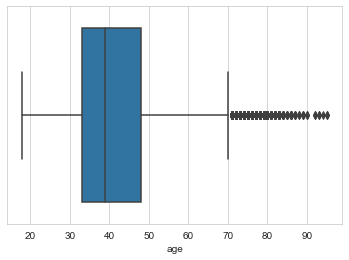

In [20]:
sns.boxplot(df_num["age"])
plt.show()

In [21]:
# cari outliers dengan fungsi IQR
lower_out = find_outliers(df_num["age"])[0]
upper_out = find_outliers(df_num["age"])[1]

In [22]:
# cek jumlah outliers
outliers = len(lower_out) + len(upper_out)
print("Jumlah Outliers:", outliers)

Jumlah Outliers: 487


In [23]:
# cek presentase outliers
print("Jumlah Data :", len(df_num))
print("Jumlah Outliers :", outliers)
print("Perc Outliers :", round((outliers/len(df_num))*100,2),"%")

Jumlah Data : 45211
Jumlah Outliers : 487
Perc Outliers : 1.08 %


In [24]:
# Hitung nilai IQR dan batas atas
iqr = df_num["age"].quantile(.75) - df_num['age'].quantile(.25)
upper_limit = df_num["age"].quantile(.75) + 1.5 * iqr

print("Upper Limit:", upper_limit)

Upper Limit: 70.5


In [25]:
# cari batas quantile untuk winsorize
df_num["age"].quantile(.98)

63.0

In [26]:
# gunakan winsorize dengan bantuan scipy
df_num["age"] = stats.mstats.winsorize(df_num["age"], limits = (0, 0.02))

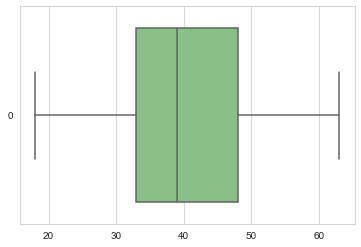

In [27]:
# visualisasi dengan boxplot
sns.boxplot(data = df_num["age"], palette = "Accent", orient = 'h')
plt.show()

#### balance

> Detecting outliers menggunakan Boxplot

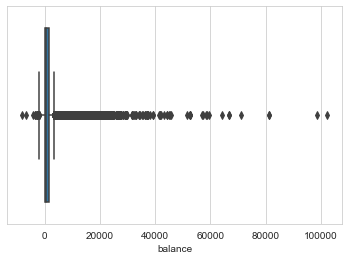

In [28]:
sns.boxplot(df_num["balance"])
plt.show()

In [29]:
# cari outliers dengan fungsi IQR
lower_out = find_outliers(df_num["balance"])[0]
upper_out = find_outliers(df_num["balance"])[1]

In [30]:
# cek jumlah outliers
outliers = len(lower_out) + len(upper_out)
print("Jumlah Outliers:", outliers)

Jumlah Outliers: 4729


In [31]:
# cek presentase outliers
print("Jumlah Data :", len(df_num))
print("Jumlah Outliers :", outliers)
print("Perc Outliers :", round((outliers/len(df_num))*100,2),"%")

Jumlah Data : 45211
Jumlah Outliers : 4729
Perc Outliers : 10.46 %


In [32]:
# Hitung nilai IQR, cari batas atas dan batas bawah
iqr = df_num["balance"].quantile(.75) - df_num['balance'].quantile(.25)
upper_limit = df_num["balance"].quantile(.75) + 1.5 * iqr
lower_limit = df_num["balance"].quantile(.25) - 1.5 * iqr

print("Upper Limit:", upper_limit)
print("Lower Limit:", lower_limit)

Upper Limit: 3462.0
Lower Limit: -1962.0


In [33]:
# cari batas quantile untuk winsorize
df_num["balance"].quantile(.89)

3321.0

In [34]:
# cari batas quantile untuk winsorize
df_num["balance"].quantile(0.0004)

-1936.212

In [35]:
# gunakan winsorize dengan bantuan scipy
df_num["balance"] = stats.mstats.winsorize(df_num["balance"], limits = (0.0004, 0.11))

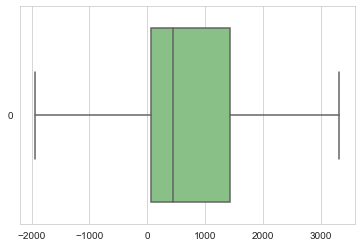

In [36]:
# visualisasi dengan boxplot
sns.boxplot(data = df_num["balance"], palette = "Accent", orient = 'h')
plt.show()

#### campaign

> Detecting outliers menggunakan Boxplot

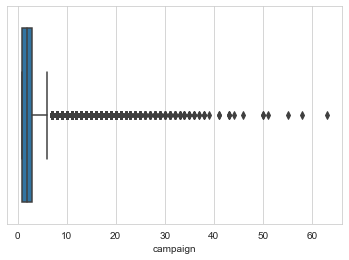

In [37]:
sns.boxplot(df_num["campaign"])
plt.show()

In [38]:
# cari outliers dengan fungsi IQR
lower_out = find_outliers(df_num["campaign"])[0]
upper_out = find_outliers(df_num["campaign"])[1]

In [39]:
# cek jumlah outliers
outliers = len(lower_out) + len(upper_out)
print("Jumlah Outliers:", outliers)

Jumlah Outliers: 3064


In [40]:
# cek presentase outliers
print("Jumlah Data :", len(df_num))
print("Jumlah Outliers :", outliers)
print("Perc Outliers :", round((outliers/len(df_num))*100,2),"%")

Jumlah Data : 45211
Jumlah Outliers : 3064
Perc Outliers : 6.78 %


In [41]:
# cek jumlah outliers
print("Jumlah Outliers:", len(lower_out) + len(upper_out))

Jumlah Outliers: 3064


In [42]:
# Hitung nilai IQR dan batas atas
iqr = df_num["campaign"].quantile(.75) - df_num['campaign'].quantile(.25)
upper_limit = df_num["campaign"].quantile(.75) + 1.5 * iqr

print("Upper Limit:", upper_limit)

Upper Limit: 6.0


In [43]:
# cari batas quantile untuk winsorize
df_num["campaign"].quantile(.93)

6.0

In [44]:
# gunakan winsorize dengan bantuan scipy
df_num["campaign"] = stats.mstats.winsorize(df_num["campaign"], limits = (0, 0.07))

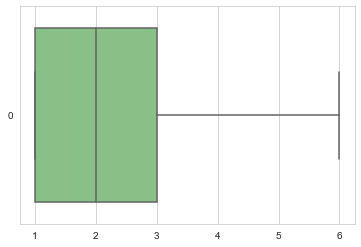

In [45]:
# visualisasi dengan boxplot
sns.boxplot(data = df_num["campaign"], palette = "Accent", orient = 'h')
plt.show()

> Semua data sudah bersih dari Null Values dan sudah sesuai dengan tipe datanya, maka kita bisa lanjut ke Feature Engineering

## EXPLORATORY DATA ANALYSIS

### TARGET FEATURE

> Kita akan melihat target featurenya terlebihdahulu

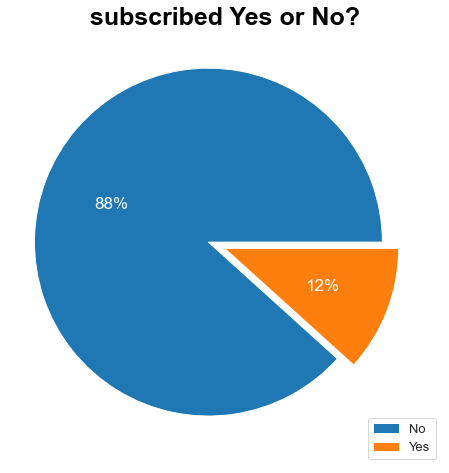

In [46]:
plt.figure(figsize = (12, 8))

plt.title('subscribed Yes or No?', size = 25, fontweight = 'bold', color = 'black')

labels = 'No', 'Yes'

plt.pie(df['subscribed'].value_counts(), autopct = '%.0f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower right', fontsize = 13)

plt.show()

In [47]:
df["subscribed"].value_counts()

no     39922
yes     5289
Name: subscribed, dtype: int64

> Berdasarkan pie chart diatas, kita bisa melihat bahwa ada sekitar 12% (5289) client yang sudah deposit, sedangkan 88% (39922) nya lagi belum.

> Selanjutnya kita akan mencoba untuk melihat distribusi masing masing featurenya

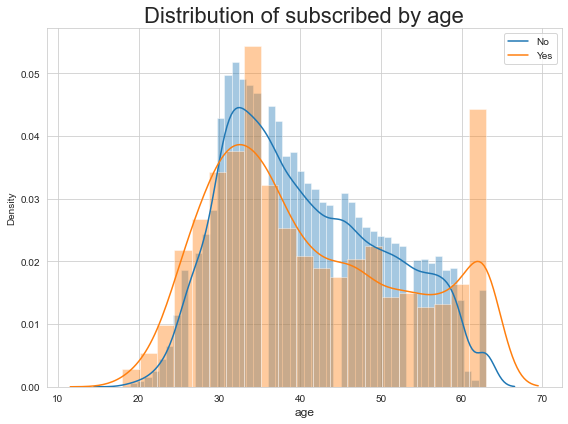

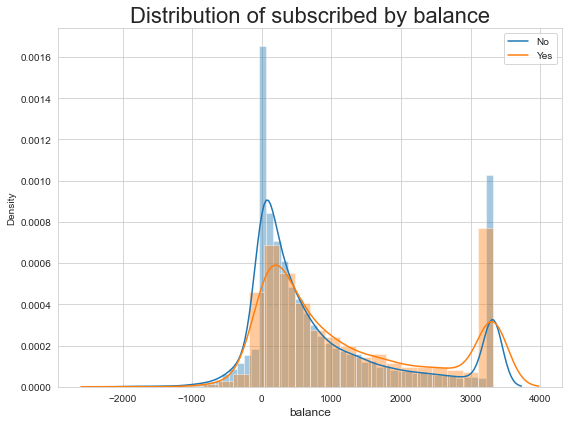

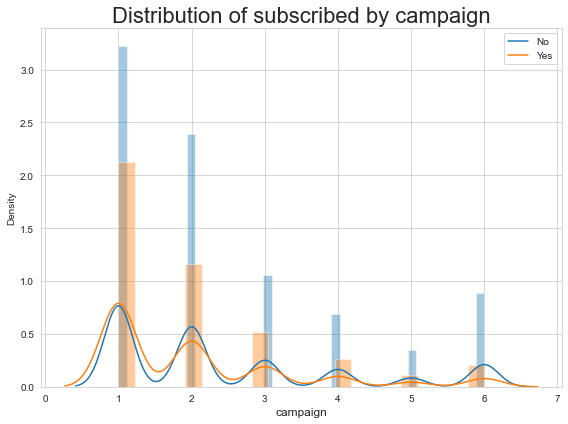

In [48]:
for i in df_num.columns:
    plt.figure(figsize = (8,6))
    ax = sns.distplot(df_num[(df['subscribed'] == 'no')][i])
    ax = sns.distplot(df_num[(df['subscribed'] == 'yes')][i])
    
    ax.legend(['No', 'Yes'])
    
    plt.xlabel(i, fontsize = 12)
    plt.title('Distribution of subscribed by ' + i, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

> - Age, pada age ini terlihat umur client yg melakukan dan tidak melakukan deposit itu bervariasi.<br>Bisa kita lihat bahwa client terbanyak yg melakukan deposit ialah client yg berada pada umur 63 tahun, sedangkan tidak ada perbedaan yg signifikan pada client yg tidak melakukan deposit.

In [49]:
df_num['age'][df['subscribed']=='yes'].value_counts().head()

63    406
32    221
30    217
33    210
35    209
Name: age, dtype: int64

In [50]:
df_num['age'][df['subscribed']=='no'].value_counts().head()

32    1864
31    1790
33    1762
34    1732
35    1685
Name: age, dtype: int64

> - Balance, pada balance ini terlihat tidak ada perbedaan yg signifikan antara client yg melakukan dan tidak melakukan deposit.

In [51]:
df_num['balance'][df['subscribed']=='yes'].value_counts().head(8)

3321    822
0       292
1        17
2        16
5        15
3        12
294      12
4        11
Name: balance, dtype: int64

In [52]:
df_num['balance'][df['subscribed']=='no'].value_counts().head(8)

3321    4154
0       3222
1        178
2        140
4        128
3        122
5         98
6         82
Name: balance, dtype: int64

> - Campaign, campaign ini adalah banyaknya kontak yg telah dilakukan kepada client tersebut selama masa campaign.<br>
Bisa kita lihat campaign tertinggi pada client yg melakukan deposit dan client yg tidak itu hanya dikontak 1x saja pada masa campaign.

In [53]:
df_num['campaign'][df['subscribed']=='yes'].value_counts().head()

1    2561
2    1401
3     618
4     317
6     253
Name: campaign, dtype: int64

In [54]:
df_num['campaign'][df['subscribed']=='no'].value_counts().head()

1    14983
2    11104
3     4903
6     4102
4     3205
Name: campaign, dtype: int64

### SUMMARY

> Melalui eksplorasi data yg telah kita lakukan, selanjutnya kita dapat menarik kesimpulan bahwa :
> - ada sekitar 12% (5289) client yang sudah deposit, sedangkan 88% (39922) nya lagi belum.
> - client yg melakukan dan tidak melakukan deposit itu bervariasi.<br>Bisa kita lihat bahwa client terbanyak yg melakukan deposit ialah client yg berada pada umur 63 tahun, sedangkan tidak ada perbedaan yg signifikan pada client yg tidak melakukan deposit
> - client yg melakukan deposit dan client yg tidak itu hanya dikontak 1x saja pada masa campaign.

## FEATURE ENGINEERING

In [55]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   job         45211 non-null  object
 1   marital     45211 non-null  object
 2   education   45211 non-null  object
 3   default     45211 non-null  object
 4   housing     45211 non-null  object
 5   loan        45211 non-null  object
 6   contact     45211 non-null  object
 7   poutcome    45211 non-null  object
 8   subscribed  45211 non-null  object
dtypes: object(9)
memory usage: 3.1+ MB


### FEATURE ENCODING

#### ONE-HOT ENCODING

> Menggunakan one-hot encoding pada features : (job, marital,  contact, poutcome), (default, housing, loan, subscribed)

In [56]:
df_cat = pd.get_dummies(df_cat, prefix = ["job", "marital", "contact", "poutcome"], columns=["job", "marital", "contact", "poutcome"])

df_cat = pd.get_dummies(df_cat, prefix = ["default", "housing", "loan"], columns=["default", "housing", "loan"], drop_first = True)

In [57]:
df_cat.head()

,education,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes
0,tertiary,no,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
1,secondary,no,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,secondary,no,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,1
3,unknown,no,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,unknown,no,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


#### ORDINAL ENCODING

> Menggunakan ordinal encoding pada features: education

In [58]:
# gunakan fit_transform untuk encode data
df_cat["education_enc"] = OrdinalEncoder().fit_transform(df_cat[["education"]])

In [59]:
# cek hasil
df_cat.groupby(["education", "education_enc"])["loan_yes"].count()

education  education_enc
primary    0.0               6851
secondary  1.0              23202
tertiary   2.0              13301
unknown    3.0               1857
Name: loan_yes, dtype: int64

> By default library ini akan mengurutkan berdasarkan abjad. Maka dari itu kita melakukan pengurutan manual terlebihdahulu

In [60]:
# menentukan urutannya (target guided)
class_order = ["unknown", "primary", "secondary", "tertiary"]
# gunakan estimasi pada fit_transform untuk encode data dengan urutan
df_cat["education_enc"] = OrdinalEncoder(categories = [class_order]).fit_transform(df_cat[["education"]])

> Drop features asal-nya.

In [61]:
df_cat = df_cat.drop(columns = ["education"])

In [62]:
df_cat.head()

,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes,education_enc
0,no,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,3.0
1,no,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,2.0
2,no,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,1,2.0
3,no,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0.0
4,no,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0.0


#### LABEL ENCODING

> Label encoding hanya digunakan untuk melakukan encoding pada variabel target (y)

In [63]:
# contoh label encoding, gunakan fit_transform untuk encode data
df_cat["subscribed_enc"] = LabelEncoder().fit_transform(df_cat[["subscribed"]])

In [64]:
# cek hasil
df_cat.groupby(["subscribed", "subscribed_enc"])["loan_yes"].count()

subscribed  subscribed_enc
no          0                 39922
yes         1                  5289
Name: loan_yes, dtype: int64

> Drop features asal-nya.

In [65]:
df_cat = df_cat.drop(columns = ["subscribed"])

In [66]:
df_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes,education_enc,subscribed_enc
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,3.0,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,1,0,2.0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,1,2.0,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0.0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0.0,0


### FEATURE SCALING

> Kita akan melakukan feature scaling pada numerical features.

In [67]:
# min max scaler
scaler = MinMaxScaler()

In [68]:
column_name = ["age", "balance", "campaign"]

In [69]:
for i in column_name:
    df_num[i +'_minmax'] = scaler.fit_transform(df_num[[i]])

In [70]:
df_num.head()

,age,balance,campaign,age_minmax,balance_minmax,campaign_minmax
0,58,2143,1,0.888889,0.776131,0.0
1,44,29,1,0.577778,0.374382,0.0
2,33,2,1,0.333333,0.369251,0.0
3,47,1506,1,0.644444,0.655074,0.0
4,33,1,1,0.333333,0.369061,0.0


> Drop features asal-nya.

In [71]:
df_num = df_num.drop(columns = column_name)

In [72]:
df_num.head()

,age_minmax,balance_minmax,campaign_minmax
0,0.888889,0.776131,0.0
1,0.577778,0.374382,0.0
2,0.333333,0.369251,0.0
3,0.644444,0.655074,0.0
4,0.333333,0.369061,0.0


### FEATURE SELECTION

In [73]:
df_new = pd.concat([df_num, df_cat], axis = 1)

In [74]:
df_new.head()

,age_minmax,balance_minmax,campaign_minmax,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes,education_enc,subscribed_enc
0,0.888889,0.776131,0.0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,3.0,0
1,0.577778,0.374382,0.0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,2.0,0
2,0.333333,0.369251,0.0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,1,2.0,0
3,0.644444,0.655074,0.0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0.0,0
4,0.333333,0.369061,0.0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0.0,0


In [75]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age_minmax         45211 non-null  float64
 1   balance_minmax     45211 non-null  float64
 2   campaign_minmax    45211 non-null  float64
 3   job_admin.         45211 non-null  uint8  
 4   job_blue-collar    45211 non-null  uint8  
 5   job_entrepreneur   45211 non-null  uint8  
 6   job_housemaid      45211 non-null  uint8  
 7   job_management     45211 non-null  uint8  
 8   job_retired        45211 non-null  uint8  
 9   job_self-employed  45211 non-null  uint8  
 10  job_services       45211 non-null  uint8  
 11  job_student        45211 non-null  uint8  
 12  job_technician     45211 non-null  uint8  
 13  job_unemployed     45211 non-null  uint8  
 14  job_unknown        45211 non-null  uint8  
 15  marital_divorced   45211 non-null  uint8  
 16  marital_married    452

#### EMBEDDED METHOD (FEATURE IMPORTANCES)

In [76]:
# split dependent dan independent (target)
X = df_new.drop(columns=["subscribed_enc"])# independent feature, non target
y = df_new["subscribed_enc"] # target

In [77]:
# embedded method dengan ExtraTree
model = ExtraTreesClassifier()
model.fit(X,y) # fit model
print(model.feature_importances_) # gunakan inbuilt class: feature_importances

[0.28118577 0.34443765 0.08267513 0.00687284 0.0058143  0.0038876
 0.00324244 0.00661329 0.00566214 0.00443823 0.00491607 0.00449458
 0.00677571 0.00430621 0.00158289 0.00530378 0.00684104 0.00630953
 0.00794923 0.00412342 0.01168189 0.00985386 0.00654294 0.06390066
 0.01719804 0.00358023 0.02376808 0.0122996  0.05374288]


In [78]:
# hasil feature importances
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10)

balance_minmax      0.344438
age_minmax          0.281186
campaign_minmax     0.082675
poutcome_success    0.063901
education_enc       0.053743
housing_yes         0.023768
poutcome_unknown    0.017198
loan_yes            0.012300
contact_unknown     0.011682
poutcome_failure    0.009854
dtype: float64

> "Multicollinearity is a common problem when estimating linear or generalized linear models, including logistic regression and Cox regression."

> Feat_importances diatas memiliki multicollinearity (poutcome_succes dengan poutcome_unknown, contact_cellular dan contact_unknown, dll), maka dari itu kita akan drop labelsnya.

In [79]:
feat_importances.drop(labels=['poutcome_unknown', 'poutcome_failure', 'contact_cellular','job_admin.','job_technician']).sort_values(ascending = False)

balance_minmax       0.344438
age_minmax           0.281186
campaign_minmax      0.082675
poutcome_success     0.063901
education_enc        0.053743
housing_yes          0.023768
loan_yes             0.012300
contact_unknown      0.011682
marital_married      0.006841
job_management       0.006613
poutcome_other       0.006543
marital_single       0.006310
job_blue-collar      0.005814
job_retired          0.005662
marital_divorced     0.005304
job_services         0.004916
job_student          0.004495
job_self-employed    0.004438
job_unemployed       0.004306
contact_telephone    0.004123
job_entrepreneur     0.003888
default_yes          0.003580
job_housemaid        0.003242
job_unknown          0.001583
dtype: float64

In [80]:
feat_importances = feat_importances.drop(labels=['poutcome_unknown', 'poutcome_failure', 'contact_cellular','job_admin.','job_technician'])

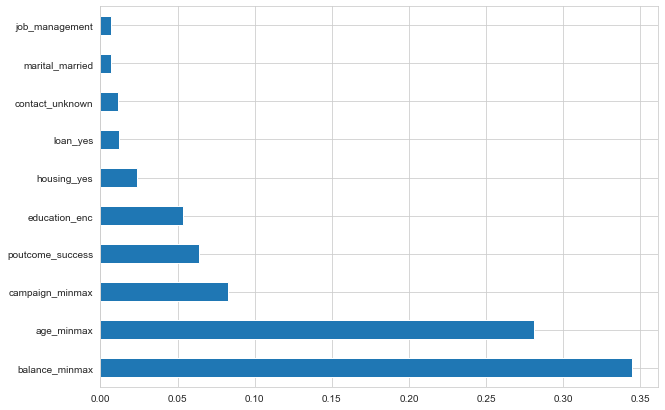

In [81]:
# plot hasil feature importances
plt.figure(figsize = (10,7))
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [82]:
# masukkan hasil kedalam dataframe baru.
col = feat_importances.nlargest(10).index.tolist()

col.append("subscribed_enc")

df_new = df_new[col]

In [83]:
df_new.head()

,balance_minmax,age_minmax,campaign_minmax,poutcome_success,education_enc,housing_yes,loan_yes,contact_unknown,marital_married,job_management,subscribed_enc
0,0.776131,0.888889,0.0,0,3.0,1,0,1,1,1,0
1,0.374382,0.577778,0.0,0,2.0,1,0,1,0,0,0
2,0.369251,0.333333,0.0,0,2.0,1,1,1,1,0,0
3,0.655074,0.644444,0.0,0,0.0,1,0,1,1,0,0
4,0.369061,0.333333,0.0,0,0.0,0,0,1,0,0,0


## MODELING

### LOGISTIC REGRESSION

In [84]:
# split target variable
X = df_new.drop(columns = 'subscribed_enc')
y = df_new['subscribed_enc']

In [85]:
# train testsplit
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0) # size test = 20%

In [86]:
# model train dan fitting
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [87]:
# buat ypredict
y_pred = model.predict(X_test)

In [88]:
# buat df untuk store hasil actual vs pred
result = pd.DataFrame()
result["y_act"] = y_test
result["y_pred"] = y_pred

In [89]:
#concat result
result = pd.concat([X_test, result], axis = 1)

In [90]:
#cek hasil
result.head()

,balance_minmax,age_minmax,campaign_minmax,poutcome_success,education_enc,housing_yes,loan_yes,contact_unknown,marital_married,job_management,y_act,y_pred
14001,0.635500,0.422222,1.0,0,3.0,1,0,0,1,1,0,0
32046,0.320791,0.400000,0.0,0,2.0,1,0,0,0,0,1,0
13318,0.291714,0.644444,0.8,0,1.0,0,1,0,1,0,0,0
42991,0.464082,0.866667,1.0,0,1.0,1,1,0,1,0,0,0
14237,0.291714,0.333333,0.2,0,2.0,1,1,0,1,0,0,0


#### CONFUSION MATRIX

In [91]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[7868  112]
 [ 874  189]]


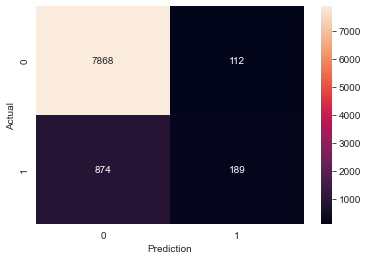

In [92]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = ".0f")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [93]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7980
           1       0.63      0.18      0.28      1063

    accuracy                           0.89      9043
   macro avg       0.76      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



> Disini menurut saya lebih penting False Positive (Prediction : 1, Actual : 0) karena dapat merugikan perusahaan.<br>
> Jadi kita akan mengutamakan precision, maka dari itu kita tidak perlu handling imbalance datanya.

In [94]:
# fungsi untuk melakukan plot roc auc curve
def plot_roc_curve(true_y, y_prob, labels):
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    
    sns.lineplot(fpr, tpr, label = labels)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


model AUC score: 0.5818817976267102



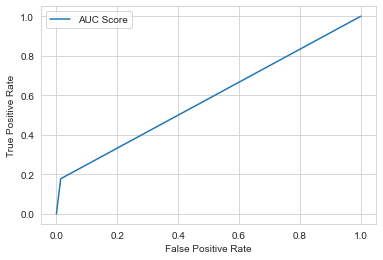

In [95]:
#plot roc auc
plot_roc_curve(y_test, y_pred, 'AUC Score')
print(f"\nmodel AUC score: {roc_auc_score(y_test, y_pred)}\n")
plt.show()

#### CV SCORE

In [96]:
# fungsi untuk cv score
def cv_score(model, data_x, data_y, scoring, n):
    cv = KFold(n_splits=n, shuffle=False)
    scores_train = cross_val_score(model, data_x, data_y, scoring=scoring, cv=cv)
    scores_test = cross_validate(model, data_x, data_y, cv=n)
    
    return scores_train.mean(), scores_test["test_score"].mean()

In [97]:
print("CV:", cv_score(model, X_train, y_train, "accuracy",5))
print("CV:", cv_score(model, X_train, y_train, "precision",5))
print("CV:", cv_score(model, X_train, y_train, "recall",5))

CV: (0.8936351379404467, 0.8935799428792274)
CV: (0.6803496687627075, 0.8935799428792274)
CV: (0.16963189907954204, 0.8935799428792274)


## HYPERPARAMETER TUNING

In [98]:
# melihat default params
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [99]:
# parameter logistic regression + nilainya pada tiap parameter dalam bentuk dictionary
param = [{'solver' : ['saga'],
          'penalty' : ['elasticnet', 'l1', 'l2', 'none'],
          'max_iter' : [i for i in range (1, 1000)], 
          'C' : [0.01, 0.1, 1], 
          'l1_ratio' : [0,1]},
         
          {'solver' : ['newton-cg', 'lbfgs'],
           'penalty' : ['l2','none'],
           'max_iter' : [i for i in range (1, 1000)],
           'C' : [0.01, 0.1, 1],
           'l1_ratio' : [0,1]}]

### RANDOM SEARCH (RANDOMIZED SEARCH CROSS VALIDATION)

In [100]:
# gunakan randomized search CV
model_rs = RandomizedSearchCV(estimator = model, n_iter = 10, param_distributions = param, cv = 5, scoring = 'precision')

In [101]:
# fit random search cv
model_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions=[{'C': [0.01, 0.1, 1],
                                         'l1_ratio': [0, 1],
                                         'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                         'penalty': ['elasticnet', 'l1', 'l2',
                                                     'none'],
                                         'solver': ['saga']},
                                        {'C': [0.01, 0.1, 1],
                                         'l1_ratio': [0, 1],
                                         'max_iter': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                         'penalty': ['l2', 'none'],
                                         'solver': ['newton-cg', 'lbfgs']}],
                   scoring='precision')

In [102]:
# hasil best parameter
model_rs.best_params_

{'solver': 'newton-cg',
 'penalty': 'l2',
 'max_iter': 751,
 'l1_ratio': 0,
 'C': 0.01}

In [103]:
# train tuned model( hasil random search cv)
model_rs_tuned = LogisticRegression(solver = 'newton-cg', penalty = 'l2', max_iter=326, l1_ratio = 1, C=  0.01)
model_rs_tuned.fit(X_train, y_train)

LogisticRegression(C=0.01, l1_ratio=1, max_iter=326, solver='newton-cg')

In [104]:
#base model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7980
           1       0.63      0.18      0.28      1063

    accuracy                           0.89      9043
   macro avg       0.76      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



In [105]:
# hasil tuned model dengan random search cv
y_pred_rs_tuned = model_rs_tuned.predict(X_test)
print(classification_report(y_test, y_pred_rs_tuned))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7980
           1       0.66      0.11      0.19      1063

    accuracy                           0.89      9043
   macro avg       0.78      0.55      0.57      9043
weighted avg       0.87      0.89      0.85      9043



> Hasil dari random search menunjukkan terdapat penurunan performance model jika dibandingkan dengan model base tanpa optimasi / tuning parameter.<br>Hal ini disebabkan karena sifatnya yang acak (randomness).<br>Kelebihan dari Random Search ini adalah training timenya yang cepat dibandingkan yg lainnya.

In [106]:
print(f"\nmodel AUC Base : {roc_auc_score(y_test, y_pred)}\n")
print(f"\nmodel AUC Random : {roc_auc_score(y_test, y_pred_rs_tuned)}\n")


model AUC Base : 0.5818817976267102


model AUC Random : 0.5529670248056642



## ENSEMBLE MODEL

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         45211 non-null  int64 
 1   job         45211 non-null  object
 2   marital     45211 non-null  object
 3   education   45211 non-null  object
 4   default     45211 non-null  object
 5   balance     45211 non-null  int64 
 6   housing     45211 non-null  object
 7   loan        45211 non-null  object
 8   contact     45211 non-null  object
 9   campaign    45211 non-null  int64 
 10  poutcome    45211 non-null  object
 11  subscribed  45211 non-null  object
dtypes: int64(3), object(9)
memory usage: 4.1+ MB


In [108]:
df_num = df.select_dtypes(["int64"])

In [109]:
df1 = pd.concat([df_num, df_cat], axis = 1)

In [110]:
df1.head()

,age,balance,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes,education_enc,subscribed_enc
0,58,2143,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,3.0,0
1,44,29,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,2.0,0
2,33,2,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,1,2.0,0
3,47,1506,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0.0,0
4,33,1,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0.0,0


### Feature Scaling

> RobustScaler

In [111]:
# robust scaler
scaler = RobustScaler()

In [112]:
column_name = ["age", "balance", "campaign"]

In [113]:
for i in column_name:
    df1[i] = scaler.fit_transform(df_num[[i]])

In [114]:
df1.head()

,age,balance,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,default_yes,housing_yes,loan_yes,education_enc,subscribed_enc
0,1.266667,1.250000,-0.5,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,3.0,0
1,0.333333,-0.308997,-0.5,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,2.0,0
2,-0.400000,-0.328909,-0.5,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,1,2.0,0
3,0.533333,0.780236,-0.5,0,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0.0,0
4,-0.400000,-0.329646,-0.5,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0.0,0


In [115]:
# split target
X = df1.drop(['subscribed_enc'], axis = 1)
y = df1['subscribed_enc']

In [116]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [117]:
# model train dan fitting
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [118]:
# buat ypredict
y_pred = model.predict(X_test)

#### CONFUSION MATRIX

In [119]:
# confusion matrix
print(confusion_matrix(y_test, y_pred))

[[7886   94]
 [ 884  179]]


In [120]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7980
           1       0.66      0.17      0.27      1063

    accuracy                           0.89      9043
   macro avg       0.78      0.58      0.60      9043
weighted avg       0.87      0.89      0.86      9043




model AUC score: 0.5783059483138703



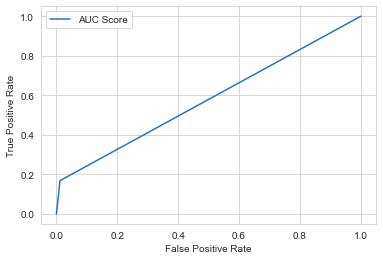

In [121]:
#plot roc auc
plot_roc_curve(y_test, y_pred, 'AUC Score')
print(f"\nmodel AUC score: {roc_auc_score(y_test, y_pred)}\n")
plt.show()

In [122]:
print("ensemble model")
print(classification_report(y_test, y_pred))

ensemble model
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7980
           1       0.66      0.17      0.27      1063

    accuracy                           0.89      9043
   macro avg       0.78      0.58      0.60      9043
weighted avg       0.87      0.89      0.86      9043



#### CV SCORE

In [123]:
print("CV:", cv_score(model, X_train, y_train, "accuracy",5))
print("CV:", cv_score(model, X_train, y_train, "precision",5))
print("CV:", cv_score(model, X_train, y_train, "recall",5))

CV: (0.893054519533299, 0.8928057824547821)
CV: (0.6684657024683889, 0.8927781314109552)
CV: (0.16844195552425587, 0.8927781314109552)


## HYPERPARAMETER TUNING

In [124]:
# melihat default params
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [125]:
# parameter GradientBoostingClassifier + nilainya pada tiap parameter dalam bentuk dictionary
param = {"n_estimators":[i for i in range(1,300)],
          "max_depth":[1,3,5,7],
          "learning_rate":[0.01,0.1,1,10,100]}

### RANDOM SEARCH (RANDOMIZED SEARCH CROSS VALIDATION)

In [126]:
# gunakan randomized search CV
model_rs = RandomizedSearchCV(estimator = model, n_iter = 10, param_distributions = param, cv = 5, scoring = 'precision')

In [127]:
# fit random search cv
model_rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [1, 3, 5, 7],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   scoring='precision')

In [128]:
# hasil best parameter
model_rs.best_params_

{'n_estimators': 79, 'max_depth': 5, 'learning_rate': 0.01}

In [129]:
# train tuned model( hasil random search cv)
model_rs_tuned = GradientBoostingClassifier(n_estimators = 180, max_depth = 1, learning_rate=0.01)
model_rs_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=1, n_estimators=180)

In [130]:
#base model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7980
           1       0.66      0.17      0.27      1063

    accuracy                           0.89      9043
   macro avg       0.78      0.58      0.60      9043
weighted avg       0.87      0.89      0.86      9043



In [131]:
# hasil tuned model dengan random search cv
y_pred_rs_tuned = model_rs_tuned.predict(X_test)
print(classification_report(y_test, y_pred_rs_tuned))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7980
           1       0.67      0.04      0.07      1063

    accuracy                           0.88      9043
   macro avg       0.78      0.52      0.50      9043
weighted avg       0.86      0.88      0.84      9043



> Hasil dari random search menunjukkan terdapat penurunan performance model jika dibandingkan dengan model base tanpa optimasi / tuning parameter.<br>Hal ini disebabkan karena sifatnya yang acak (randomness).<br>Kelebihan dari Random Search ini adalah training timenya yang cepat dibandingkan yg lainnya.

In [132]:
print(f"\nmodel AUC Base : {roc_auc_score(y_test, y_pred)}\n")
print(f"\nmodel AUC Random : {roc_auc_score(y_test, y_pred_rs_tuned)}\n")


model AUC Base : 0.5783059483138703


model AUC Random : 0.5166834654840299

